# Young People Survey

This program demonstrates the use of several standard approaches in Machine Learning. 

We are planning build a reduced dimension data set where customer level of spending will be the prevailing information underlying the features.

## Among the techniques that can be used are

-Use of scaling as data processing

-Filtering of outliers

-Processing of Missing Data

-Random Forrest to select the most meaningful features

-Clustering with K-prototype if we have categorical features

-PCA (principal component analysis)

##  Key functionalities
reading & saving csv file, drop column, group by to perform operation, filling missing data (Nan), processing categorical data, using a random forrest classifier, PCA, K-means clustering and Elbow method, histograms and scatter plots


Data is from Kaggle Competition and freely accessible: [Survey page](https://www.kaggle.com/miroslavsabo/young-people-survey)

*Warning: code may not be the best around, but it is reasonable data scientist level (I come from C++ and always discover new things in python or R).*

In [263]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as skl
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

Load the young people survey dataset. Use the path where you stored the data.

In [264]:
# Load the young people survey dataset
df = pd.read_csv("C:/Users/QP03/1.DataSets/Young People/responsesC.csv")


It is always good to have a look at the data, we will call the dataframe. We can see that we have digits for ranking (numerical), categorical data and missing data (Nan).

In [265]:
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,1.0,2.0,1.0,4.0,3.0,3.0,5.0,4.0,...,24.0,168.0,55.0,10.0,female,right handed,college/bachelor degree,no,city,block of flats
1,5.0,3.0,4.0,2.0,4.0,3.0,3.0,5.0,4.0,1.0,...,18.0,163.0,58.0,6.0,female,right handed,secondary school,no,city,block of flats
2,5.0,3.0,5.0,5.0,2.0,5.0,3.0,3.0,3.0,1.0,...,22.0,175.0,86.0,6.0,female,left handed,college/bachelor degree,no,city,block of flats
3,5.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,...,18.0,165.0,45.0,5.0,female,left handed,primary school,no,city,block of flats
4,5.0,5.0,3.0,1.0,3.0,2.0,3.0,3.0,4.0,3.0,...,20.0,158.0,46.0,4.0,female,left handed,secondary school,no,city,block of flats
5,5.0,3.0,4.0,4.0,3.0,4.0,5.0,4.0,3.0,2.0,...,18.0,164.0,51.0,4.0,female,right handed,secondary school,no,city,block of flats
6,5.0,5.0,1.0,5.0,1.0,NaN,5.0,3.0,5.0,5.0,...,18.0,168.0,50.0,4.0,female,right handed,secondary school,no,village,house/bungalow
7,5.0,3.0,2.0,3.0,3.0,4.0,5.0,2.0,1.0,1.0,...,20.0,168.0,50.0,4.0,female,right handed,secondary school,no,village,house/bungalow
8,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,...,19.0,164.0,53.0,4.0,female,right handed,secondary school,no,village,house/bungalow
9,5.0,3.0,3.0,2.0,5.0,4.0,5.0,3.0,5.0,4.0,...,18.0,172.0,60.0,4.0,female,right handed,secondary school,no,city,NaN


# Processing of missing data

In this part, we will segment the data according to gender and place of residence. We will assume that the most answered response in these segments (by gender and place of residence) will be the missing value.

There are other techniques to estimate the missing data but this approach will be good enough for our needs. 

In [266]:
# process missing values
# (a) assume that according to gender and living location, missing value can be replaced by the most common
Xfc = df[(df["Gender"]=='female')&(df["Village - town"]=='city')]
Xfv = df[(df["Gender"]=='female')&(df["Village - town"]=='village')]
Xmc = df[(df["Gender"]=='male')&(df["Village - town"]=='city')]
Xmv = df[(df["Gender"]=='male')&(df["Village - town"]=='village')]


For each defined segment, we count the each answer and select the one that appears the most often to replace the Nan values 

In [267]:
#(b) fill in the missing values 
X_noNan1= pd.DataFrame(Xfc.apply(lambda x: x.fillna(x.value_counts().index[0]),axis=0))
X_noNan2= pd.DataFrame(Xfv.apply(lambda x: x.fillna(x.value_counts().index[0]),axis=0))
X_noNan3= pd.DataFrame(Xmc.apply(lambda x: x.fillna(x.value_counts().index[0]),axis=0))
X_noNan4= pd.DataFrame(Xmv.apply(lambda x: x.fillna(x.value_counts().index[0]),axis=0))


We group together the sub-segments with no missing value anymore

In [268]:
#(c) re-assemble the disjoint segments
df_noNan = pd.concat([X_noNan1,X_noNan2,X_noNan3,X_noNan4])

# Processing of categorical data

For this, we will use the panda method get_dummies and append to the existing dataframe the created sections. There are more elegant way to proceed (with lists for example) but the "brute force" will do for the moment

In [269]:
# Create a set of dummy variables from the categorical variables
df_Smoking = pd.get_dummies(df_noNan['Smoking'])
df_Alcohol = pd.get_dummies(df_noNan['Alcohol'])
df_Punctuality = pd.get_dummies(df_noNan['Punctuality'])
df_Lying = pd.get_dummies(df_noNan['Lying'])
df_Internet = pd.get_dummies(df_noNan['Internet usage'])
df_Gender = pd.get_dummies(df_noNan['Gender'])
df_Hand = pd.get_dummies(df_noNan['Left - right handed'])
df_Education = pd.get_dummies(df_noNan['Education'])
df_City = pd.get_dummies(df_noNan['Village - town'])
df_House = pd.get_dummies(df_noNan['House - block of flats'])

Append all the new dummy categories together to the dataframe that contains no Nan

for memory, indexes of categorical variables are: [73, 74,107,108,132,144,145,146,147,148,149]

In [270]:
# join the new dummy columns to the main dataframe
df_new = pd.concat([df_noNan, df_Smoking], axis=1)
df_new = pd.concat([df_new, df_Alcohol], axis=1)
df_new = pd.concat([df_new, df_Punctuality], axis=1)
df_new = pd.concat([df_new, df_Lying], axis=1)
df_new = pd.concat([df_new, df_Internet], axis=1)
df_new = pd.concat([df_new, df_Gender], axis=1)
df_new = pd.concat([df_new, df_Hand], axis=1)
df_new = pd.concat([df_new, df_Education], axis=1)
df_new = pd.concat([df_new, df_Hand], axis=1)
df_new = pd.concat([df_new, df_City], axis=1)
df_new = pd.concat([df_new, df_House], axis=1)
#df_new

In [271]:
#remove original categorical data that has been transformed now into dummy variables
df_new.drop(['Smoking','Alcohol','Punctuality','Lying','Internet usage','Gender', 'Left - right handed',
            'Education','Only child', 'Village - town','House - block of flats'], axis = 1,inplace = True)

Build list of numerical fields (not the categorical data transformed in numerical). This proved useful at point for the data exploration but maybe not necessary in the rest of the code

In [272]:
#all the fields for memory, blanked out only the categorical ones
list_of_Numeric_fields= ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies',
       'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western',
       'Action', 'History', 'Psychology', 'Politics', 'Mathematics',
       'Physics', 'Internet', 'PC', 'Economy Management', 'Biology',
       'Chemistry', 'Reading', 'Geography', 'Foreign languages',
       'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion',
       'Countryside, outdoors', 'Dancing', 'Musical instruments',
       'Writing', 'Passive sport', 'Active sport', 'Gardening',
       'Celebrities', 'Shopping', 'Science and technology', 'Theatre',
       'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying', 'Storm',
       'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing',
       'Dangerous dogs', 'Fear of public speaking', 
                         #'Smoking', 
                         #'Alcohol',
       'Healthy eating', 'Daily events', 'Prioritising workload',
       'Writing notes', 'Workaholism', 'Thinking ahead', 'Final judgement',
       'Reliability', 'Keeping promises', 'Loss of interest',
       'Friends versus money', 'Funniness', 'Fake', 'Criminal damage',
       'Decision making', 'Elections', 'Self-criticism', 'Judgment calls',
       'Hypochondria', 'Empathy', 'Eating to survive', 'Giving',
       'Compassion to animals', 'Borrowed stuff', 'Loneliness',
       'Cheating in school', 'Health', 'Changing the past', 'God',
       'Dreams', 'Charity', 'Number of friends', 
                         #'Punctuality', 
                         #'Lying',
       'Waiting', 'New environment', 'Mood swings',
       'Appearence and gestures', 'Socializing', 'Achievements',
       'Responding to a serious letter', 'Children', 'Assertiveness',
       'Getting angry', 'Knowing the right people', 'Public speaking',
       'Unpopularity', 'Life struggles', 'Happiness in life',
       'Energy levels', 'Small - big dogs', 'Personality',
       'Finding lost valuables', 'Getting up', 'Interests or hobbies',
       "Parents' advice", 'Questionnaires or polls', 
                         #'Internet usage',
       'Finances', 'Shopping centres', 'Branded clothing',
       'Entertainment spending', 'Spending on looks',
       'Spending on gadgets', 'Spending on healthy eating', 'Age',
       'Height', 'Weight', 'Number of siblings', 
                          #'Gender',
                          #'Left - right handed', 
                          #'Education', 
                          #'Only child', 
                          #'Village - town',
                          #'House - block of flats'
                        ]

In [273]:
#df_new.shape

# Prepare data for dimension reduction

We will basically create a new feature that relates to the "big spenders". We will consider that the youngster is a big spender if he or she scores equal or above 16 points out of 20 available in 4 categories for spending habits.

To be noted that the scoring is dependent on the self perception of the respondant, not necessarily on the actual amouunt of money he/she spends.

This newly created field will be particularly useful in selecting the features that have the most impact when we attempt to classify the individual as big spender vs not big spender.

So when we will perform additional studies on the data set, we will know that the underlying features that remain after dimensionality reduction where chosen because they maximize the separation between spenders and not spenders.

In other words, let's say we initially have +150 features, we can reduce the dimension to say 20 features that we have selected with a spender/not spender bias. Whatever other analytics will do on the dataset will contain the features that gives the most information about the spending habits

In [274]:
#determine "high spenders"
#this is a bit arbitrary - another formula could be find.
# basically, we look at how big is the spending in all spending categories
df_new["High spender5"] = ( df_new["Entertainment spending"] + df_new["Spending on looks"] +  
                            df_new["Spending on healthy eating"] + df_new["Spending on gadgets"])

we rescale the field as big spender or not (i.e if score >= 16 then individual is considered big spender = 1) 

In [275]:
#we arbitrarily decide that big spender score is above 16/20
df_new["High spender"]=df_new["High spender5"].apply(lambda x: 1 if x >= 16 else 0)

We can check where we stand with the threshold score that we have select. With 16, we have 196/1000. Which gives us the top 20% with a self perception fo spending a lot

In [276]:
# check how many big spenders that make out of 1,000
df_new["High spender"].sum()

196L

Quick healthcheck. We have 186 features for 1,000 observations

In [277]:
df_new.shape

(1000, 175)

Keep somewhere the indexes of the high spenders, this will be useful when we perform Machine Learning algorithm to have this as our Y target

In [278]:
#extract our target y the "spenders"
y2 = list(df_new['High spender'])  #<--- check that expression again, there is probably a more elegant way

y=pd.DataFrame(y2)

Remove now from the data the fields about spending so we don't have high colinearity between our Y and the observations. We are mostly interested in identifying the features that will let us know whether we have "big spenders" or without prior knowledge on the respondents spending habits

In [279]:
#remove all variables directly linked to spending so we don't have redundancies in the data
#that would be too strong of a predictor
df_new.drop(df_new[["High spender","High spender5","Entertainment spending","Spending on gadgets", 
                    "Spending on looks","Spending on healthy eating"]], axis = 1,inplace = True)


Perform a small healthcheck to make sure we have numerical data and that all looks reasonably correct

In [280]:
df_new.shape

(1000, 169)

In [281]:
#healthcheck of content to make sure everything is reasonable 
df_new.ix[:0, :169]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,doctorate degree,masters degree,primary school,secondary school,left handed,right handed,city,village,block of flats,house/bungalow
0,5.0,3.0,1.0,2.0,1.0,4.0,3.0,3.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


# Removing outliers

At this stage it may be good to remove outliers, typically that should involve looking at the variance of each features and removing the rows (or replacing the value by an average or a most answered value) when the feature value is bigger than 3 x sample variance.

Here, actually, I did not find it useful because most of the values aree bounded between 1 and 5. One respondant answered about having 10 sibblings. This lone data observation is not going to impact significantly anything really. So we can skip this stage.


In [282]:
#possibly needed to reomve the outliers but it proved that it doesn't really matter on this data set 
#- almost everything is bounded between the 1-5 range and one respondant had 10 sibblings.

# Random Forest

We will use a random forrest classifier to extract the features that are the most relevant in determining whether the person is a spender or not. Once we will have these features, we can perform cluster analysis. 

Separate our data into training and test data. Remember the y we saved earlier, it containts all the binary information whether the respondant is a big spender or not.

## Train the model

In [283]:
#separate our data between training and test data
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.33)

In [284]:
# (a)select a classifier: here random forest
forest = RandomForestClassifier(n_estimators = 15)

# (b)train the model
forest = forest.fit(X_train,y_train.values.ravel())



## Test the model

It may be worthwile to remember that we have 196 "big spenders" out of 1,000 respondants. So if we constantly answer that the individual is not a big spender, our prediction accuracy will become 1- 196/1000 or 80.4%

Remember also that we are trying to determine the features that are most significant in predicting the "spenders". We are not focusing on the prediction itself. The beauty of Random Forrest classifiers is in helping us reducing the data dimension. Therefore an accuracy slightly lower that 80% will still yield interesting information for analytics

In [285]:
#and give us the accuracy of the prediction of the model
forest.score(X_test,y_test.values.ravel())

0.82727272727272727

To inspect by hand the values of the prediction, use the method predict:

In [286]:
# (c) predict for validation the class (spender or not) on our test data
output = forest.predict(X_test)

# Dimension reduction

Select the features out of the +160 that will capture the most information

In [287]:
#pick all the features
features = pd.DataFrame(forest.feature_importances_)

In [288]:
#rank the features by order of importance for classification
#this will be useful 
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


You can try to play with Max_number_of_indices to see the graph of the features importance. Here, plotting only the first 60 most important features yielded interesting information. Beyond this number, the graph becomes cluttured and no significant info is added

In [289]:
# Print the feature ranking (comes from trial and error looking at the graph below)
Max_number_of_indices = 60

print("Feature ranking:")

for f in range(Max_number_of_indices):
    print("%d. feature %d (%f) percentage %f" % (f + 1, indices[f], importances[indices[f]] , importances[indices[f]]/importances[indices[0]]))



Feature ranking:
1. feature 130 (0.090883) percentage 1.000000
2. feature 129 (0.029670) percentage 0.326470
3. feature 110 (0.028669) percentage 0.315448
4. feature 128 (0.019344) percentage 0.212847
5. feature 57 (0.018609) percentage 0.204760
6. feature 84 (0.017819) percentage 0.196065
7. feature 115 (0.015670) percentage 0.172417
8. feature 29 (0.014980) percentage 0.164831
9. feature 104 (0.013948) percentage 0.153471
10. feature 46 (0.013795) percentage 0.151792
11. feature 132 (0.013288) percentage 0.146210
12. feature 133 (0.012806) percentage 0.140909
13. feature 103 (0.012030) percentage 0.132369
14. feature 61 (0.011938) percentage 0.131353
15. feature 121 (0.011746) percentage 0.129240
16. feature 38 (0.011151) percentage 0.122700
17. feature 120 (0.010969) percentage 0.120689
18. feature 56 (0.010763) percentage 0.118423
19. feature 68 (0.010069) percentage 0.110788
20. feature 114 (0.009756) percentage 0.107351
21. feature 65 (0.009405) percentage 0.103490
22. feature 86

In [290]:
#top_indices really means here "most important features selected" - first show all the features
Max_number_of_indices = len(importances)

top_indices = indices[:Max_number_of_indices]

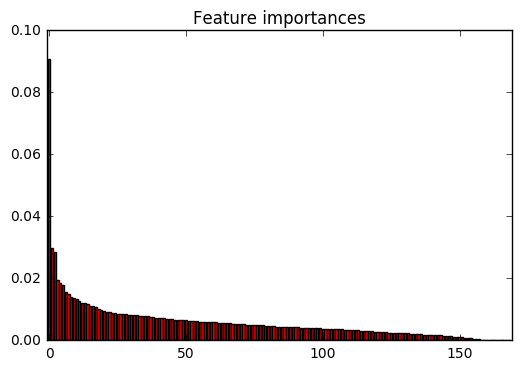

In [291]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(np.arange(Max_number_of_indices), importances[top_indices], color="r", align="center")
plt.xlim([-1, Max_number_of_indices])
plt.show()

information value is decreased as we look at more features. The following graph will show the relative important of the main features in the data set

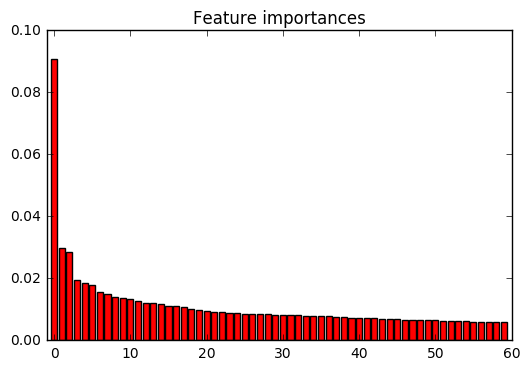

In [292]:
Max_number_of_indices = 60

top_indices = indices[:Max_number_of_indices]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(np.arange(Max_number_of_indices), importances[top_indices], color="r", align="center")
plt.xlim([-1, Max_number_of_indices])
plt.show()

## Save the file (optional)

You can save the reduced features file at this stage to perform all kind of local analytics or experiments

You can play with "top_indices" value and save as much or as little features as you want. You can try to re-run the classifier on the reduced dimension data set. Usually, the prediction is not too much degraded with less features.

However, the main purpose of all what we have done is dimension reduction (not prediction).

In [293]:
#save the top selected features
FilteredFeatures = df_new[top_indices]

#add the big purchaser feature to your file (can always be useful and anyway you have the data!)
FilteredFeatures.loc[:,"Purchaser"] = y.values.ravel()

**Feel free to uncomment** the line of code below to save the file. Make sure you write your own path where to save it

In [294]:
#Here the save step is commented out so as not cluter my disk or constantly overwrite a specific version of the file that I
#already have

#FilteredFeatures.to_csv("C:/Users/QP03/1.DataSets/Young People/X - Filtered Features no Nan.csv")

Let's have a quick look at the content of the dataframe. The features are those that should help us analyze the data knowing that they were selected for their ability to predict whether a respondant is a big spender or not... (the actual status being contained in the feature **"Purchaser"**).

In [295]:
FilteredFeatures

,Branded clothing,Shopping centres,Achievements,Finances,Shopping,Funniness,Knowing the right people,Western,Number of friends,Cars,...,God,Eating to survive,Fear of public speaking,Art exhibitions,Finding lost valuables,"Hiphop, Rap",Sci-fi,Giving,Self-criticism,Purchaser
0,1.0,1.0,3.0,4.0,2.0,3.0,3.0,1.0,3,3.0,...,1.0,3,2.0,1.0,1.0,3.0,1.0,2.0,5.0,0
1,2.0,4.0,3.0,2.0,3.0,3.0,4.0,3.0,3,2.0,...,5.0,1,2.0,4.0,3.0,3.0,3.0,3.0,4.0,0
2,3.0,3.0,2.0,4.0,5.0,2.0,5.0,3.0,3,5.0,...,5.0,3,1.0,5.0,1.0,5.0,4.0,4.0,3.0,0
3,2.0,5.0,3.0,3.0,5.0,4.0,3.0,2.0,2,4.0,...,4.0,2,4.0,3.0,4.0,5.0,2.0,5.0,3.0,0
4,1.0,3.0,2.0,1.0,5.0,1.0,3.0,2.0,5,3.0,...,3.0,1,2.0,4.0,1.0,4.0,2.0,1.0,1.0,0
5,3.0,5.0,2.0,3.0,3.0,1.0,2.0,1.0,5,5.0,...,5.0,5,5.0,5.0,3.0,3.0,1.0,5.0,3.0,0
9,2.0,2.0,4.0,1.0,2.0,5.0,3.0,1.0,5,1.0,...,5.0,2,3.0,2.0,3.0,3.0,2.0,2.0,4.0,0
10,5.0,2.0,1.0,4.0,3.0,4.0,4.0,1.0,2,1.0,...,5.0,1,5.0,3.0,3.0,2.0,3.0,1.0,5.0,0
12,3.0,4.0,4.0,4.0,5.0,4.0,3.0,2.0,2,3.0,...,5.0,4,3.0,2.0,5.0,4.0,5.0,3.0,2.0,1
15,3.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,3,2.0,...,5.0,4,3.0,3.0,3.0,1.0,1.0,4.0,5.0,0


# Clustering

While there are several way to perform clustering, we will do one of the most popular. K-means. To be noted that this method works best with numerical data. For data that contains categorical value, I recommend to try out K-prototypes, it sometimes gives interesting results.

A few comments:

a) K-Means is initialized on random points of the data set, so you will not always get the same clusters, however, even if they are "re-ordered" and have a bit less or a bit more data points, they should still give relatively homogenous clusters to study. Hopefully, we will find out what are the characteristics of the big spenders, the "frugals" and everything in between. I have done it on this data set, and the results are quite amusing.

b) K-means works better on scaled data. This is hardly surprising as you compute the distance between vectors and if some of the dimensions are all other the place, the computation of the distances may very well be too. 

c) We will use the "elbow" method to determine the number of clusters. Look it up on the internet, it is basically when the average distortion of the clustering starts to plateau. 

remove the "purchaser" information from the file if we are continuning from this point.

In [296]:
FilteredFeatures.drop(FilteredFeatures[["Purchaser"]], axis = 1,inplace = True)

C:\Users\QP03\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


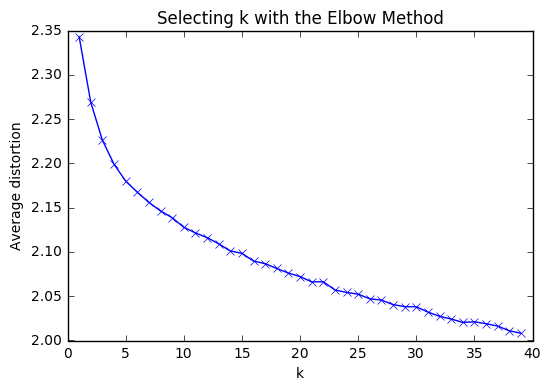

In [298]:
#selecting k for K-means with the dispertion and bent elbow method
#(basically, when too few information is gained we should not select k)
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

FilteredFeatures_scaled = scaler.fit_transform(FilteredFeatures)


K = range(1, 40)
meandistortions = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(FilteredFeatures_scaled)
    meandistortions.append(sum(np.min(cdist(FilteredFeatures_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) 
                                / FilteredFeatures.shape[0]) 
    
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

We can see that at 14 clusters (k=14) the curb makes a plateau... yes, it is a bit a strech of the imagination. However, quite frankly, you also have to understand what you are analyzing. Young people and their characteristics according to spending (you could chose another characterizer of course).

Coincidly, 16 is the number of personality types on the MBTI framework (very interesting personality theory, often used in career counceling). So not too far off even if we don't have that many data points. But more checks need to be done and let's not do too much science fiction here.

Nothing prevents you from using less clusters as the data with more similarity will aggregate together. 6 could be a good number. Again, there is no engraved rules, you should go back to your data and try to understand what the algorithm is telling you.

One other approach I would recommend is to segment the data by age group, under the assumption that the among younsters, the older the more financial means one has, additionally, experience and taste will very likely differ from one generation to another and it will be easier to actually see if spender and non spender have very specific characters. However, our data set contains only 1,000 data points and performing clustering on subsets pushes a bit the envelope.

Nevertheless, performing clustering on the full data set yields very interesting results and one can already start to visualizes who is spending and who is not.

For our needs, we will select 14 clusters

In [299]:
#Perform a clustering
#chose cluster number Probably need to draw
k = 14
kmeans = KMeans(n_clusters=k)


kmeans.fit(FilteredFeatures_scaled)

#to get the location of the centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

cluster_label = kmeans.predict(FilteredFeatures_scaled)

#add cluster number to data points
FilteredFeatures["cluster"] = cluster_label

C:\Users\QP03\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


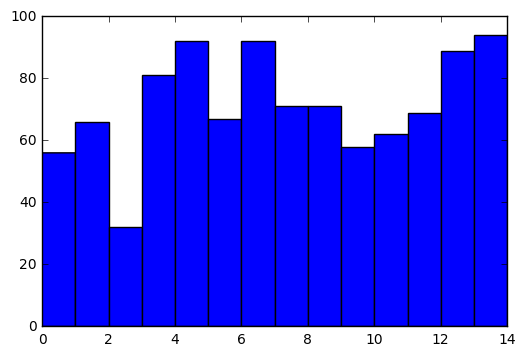

In [300]:
#draw the clusters [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
import matplotlib.pyplot as plt
plt.hist(cluster_label,bins=range(k+1))
plt.show()

We can do the same on a much more reduced number of clusters. Let's go for 4!

In [301]:
FilteredFeatures

,Branded clothing,Shopping centres,Achievements,Finances,Shopping,Funniness,Knowing the right people,Western,Number of friends,Cars,...,God,Eating to survive,Fear of public speaking,Art exhibitions,Finding lost valuables,"Hiphop, Rap",Sci-fi,Giving,Self-criticism,cluster
0,1.0,1.0,3.0,4.0,2.0,3.0,3.0,1.0,3,3.0,...,1.0,3,2.0,1.0,1.0,3.0,1.0,2.0,5.0,3
1,2.0,4.0,3.0,2.0,3.0,3.0,4.0,3.0,3,2.0,...,5.0,1,2.0,4.0,3.0,3.0,3.0,3.0,4.0,4
2,3.0,3.0,2.0,4.0,5.0,2.0,5.0,3.0,3,5.0,...,5.0,3,1.0,5.0,1.0,5.0,4.0,4.0,3.0,10
3,2.0,5.0,3.0,3.0,5.0,4.0,3.0,2.0,2,4.0,...,4.0,2,4.0,3.0,4.0,5.0,2.0,5.0,3.0,13
4,1.0,3.0,2.0,1.0,5.0,1.0,3.0,2.0,5,3.0,...,3.0,1,2.0,4.0,1.0,4.0,2.0,1.0,1.0,13
5,3.0,5.0,2.0,3.0,3.0,1.0,2.0,1.0,5,5.0,...,5.0,5,5.0,5.0,3.0,3.0,1.0,5.0,3.0,10
9,2.0,2.0,4.0,1.0,2.0,5.0,3.0,1.0,5,1.0,...,5.0,2,3.0,2.0,3.0,3.0,2.0,2.0,4.0,4
10,5.0,2.0,1.0,4.0,3.0,4.0,4.0,1.0,2,1.0,...,5.0,1,5.0,3.0,3.0,2.0,3.0,1.0,5.0,7
12,3.0,4.0,4.0,4.0,5.0,4.0,3.0,2.0,2,3.0,...,5.0,4,3.0,2.0,5.0,4.0,5.0,3.0,2.0,0
15,3.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,3,2.0,...,5.0,4,3.0,3.0,3.0,1.0,1.0,4.0,5.0,6


# Perform some stats on the clusters

let's look a bit if those clusters contain an 

Add back the "big spender" indicator

In [302]:
FilteredFeatures.loc[:,"Purchaser"] = y.values.ravel()

In [303]:
FilteredFeatures.groupby(['cluster']).mean()

,Branded clothing,Shopping centres,Achievements,Finances,Shopping,Funniness,Knowing the right people,Western,Number of friends,Cars,...,God,Eating to survive,Fear of public speaking,Art exhibitions,Finding lost valuables,"Hiphop, Rap",Sci-fi,Giving,Self-criticism,Purchaser
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.339286,3.982143,2.964286,3.089286,4.375000,3.500000,3.482143,1.857143,3.410714,2.714286,...,3.553571,2.589286,3.678571,3.375000,3.017857,3.375000,3.517857,3.285714,3.857143,0.214286
1,2.984848,3.666667,3.151515,3.181818,3.878788,2.984848,3.484848,2.075758,3.909091,2.969697,...,3.439394,2.075758,2.712121,3.000000,2.984848,3.712121,3.257576,3.530303,3.166667,0.287879
2,3.812500,1.968750,2.906250,2.406250,2.000000,3.437500,3.781250,2.281250,3.500000,3.750000,...,1.687500,2.156250,2.062500,1.906250,2.093750,2.718750,3.218750,1.906250,3.156250,0.218750
3,1.901235,1.938272,2.851852,3.333333,1.901235,3.259259,2.592593,2.592593,2.580247,2.135802,...,2.370370,2.000000,3.000000,2.987654,2.938272,1.938272,3.456790,2.259259,3.790123,0.024691
4,2.597826,2.793478,2.891304,3.152174,3.054348,3.532609,3.521739,2.336957,3.586957,1.923913,...,4.163043,2.336957,2.554348,3.782609,3.467391,2.326087,3.315217,3.293478,4.054348,0.097826
5,4.328358,4.104478,3.373134,2.582090,3.805970,3.671642,4.164179,2.358209,3.895522,4.238806,...,3.059701,1.985075,2.134328,1.985075,2.746269,4.208955,3.253731,2.850746,3.164179,0.582090
6,2.521739,3.119565,2.836957,3.413043,3.521739,2.652174,3.108696,1.510870,3.032609,1.760870,...,4.228261,2.054348,3.152174,2.739130,3.543478,2.065217,2.260870,3.293478,3.891304,0.054348
7,2.492958,2.718310,2.788732,2.873239,3.014085,3.267606,3.422535,1.380282,2.943662,1.394366,...,2.619718,1.774648,3.154930,2.450704,2.535211,2.098592,2.633803,2.309859,3.887324,0.098592
8,3.098592,2.661972,2.957746,2.816901,2.408451,3.478873,3.323944,2.098592,3.042254,3.718310,...,2.718310,2.845070,3.028169,1.661972,2.084507,3.225352,3.774648,2.816901,3.183099,0.140845


save file for manual examination

In [304]:
FilteredFeatures.to_csv('C:/Users/QP03/1.DataSets/Young People/ClusteredFeatures.csv', sep=',')

# Principal Component Analysis

The idea is to find a linear combination of the features of each cluster that capture as much as possible of the information contained in the data set 

Let's create a new table to perform a PCA on the "summarized" clusters

This should give us some insights as to what the clusters are, remembering that the main features selected are those that
facilitate the finding of the "big" spenders - it doesn't mean that the data points are the big spenders, it just means that the 
features we have selected for dimension reduction are just those that help to discriminate the most between spenders in a 
decision tree

Let's remove the "high spender" feature from our data frame so we aree sure the selection of the com

In [305]:
#calculate the mean of each features by cluster group
Clustered_table = FilteredFeatures.groupby(["cluster"]).mean()

In [306]:
Clustered_table

,Branded clothing,Shopping centres,Achievements,Finances,Shopping,Funniness,Knowing the right people,Western,Number of friends,Cars,...,God,Eating to survive,Fear of public speaking,Art exhibitions,Finding lost valuables,"Hiphop, Rap",Sci-fi,Giving,Self-criticism,Purchaser
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.339286,3.982143,2.964286,3.089286,4.375000,3.500000,3.482143,1.857143,3.410714,2.714286,...,3.553571,2.589286,3.678571,3.375000,3.017857,3.375000,3.517857,3.285714,3.857143,0.214286
1,2.984848,3.666667,3.151515,3.181818,3.878788,2.984848,3.484848,2.075758,3.909091,2.969697,...,3.439394,2.075758,2.712121,3.000000,2.984848,3.712121,3.257576,3.530303,3.166667,0.287879
2,3.812500,1.968750,2.906250,2.406250,2.000000,3.437500,3.781250,2.281250,3.500000,3.750000,...,1.687500,2.156250,2.062500,1.906250,2.093750,2.718750,3.218750,1.906250,3.156250,0.218750
3,1.901235,1.938272,2.851852,3.333333,1.901235,3.259259,2.592593,2.592593,2.580247,2.135802,...,2.370370,2.000000,3.000000,2.987654,2.938272,1.938272,3.456790,2.259259,3.790123,0.024691
4,2.597826,2.793478,2.891304,3.152174,3.054348,3.532609,3.521739,2.336957,3.586957,1.923913,...,4.163043,2.336957,2.554348,3.782609,3.467391,2.326087,3.315217,3.293478,4.054348,0.097826
5,4.328358,4.104478,3.373134,2.582090,3.805970,3.671642,4.164179,2.358209,3.895522,4.238806,...,3.059701,1.985075,2.134328,1.985075,2.746269,4.208955,3.253731,2.850746,3.164179,0.582090
6,2.521739,3.119565,2.836957,3.413043,3.521739,2.652174,3.108696,1.510870,3.032609,1.760870,...,4.228261,2.054348,3.152174,2.739130,3.543478,2.065217,2.260870,3.293478,3.891304,0.054348
7,2.492958,2.718310,2.788732,2.873239,3.014085,3.267606,3.422535,1.380282,2.943662,1.394366,...,2.619718,1.774648,3.154930,2.450704,2.535211,2.098592,2.633803,2.309859,3.887324,0.098592
8,3.098592,2.661972,2.957746,2.816901,2.408451,3.478873,3.323944,2.098592,3.042254,3.718310,...,2.718310,2.845070,3.028169,1.661972,2.084507,3.225352,3.774648,2.816901,3.183099,0.140845


Let's reshape the table and get rid of the "cluster" row

In [307]:
tableforPCA= Clustered_table.reset_index()

In [308]:
tableforPCA

,cluster,Branded clothing,Shopping centres,Achievements,Finances,Shopping,Funniness,Knowing the right people,Western,Number of friends,...,God,Eating to survive,Fear of public speaking,Art exhibitions,Finding lost valuables,"Hiphop, Rap",Sci-fi,Giving,Self-criticism,Purchaser
0,0,3.339286,3.982143,2.964286,3.089286,4.375000,3.500000,3.482143,1.857143,3.410714,...,3.553571,2.589286,3.678571,3.375000,3.017857,3.375000,3.517857,3.285714,3.857143,0.214286
1,1,2.984848,3.666667,3.151515,3.181818,3.878788,2.984848,3.484848,2.075758,3.909091,...,3.439394,2.075758,2.712121,3.000000,2.984848,3.712121,3.257576,3.530303,3.166667,0.287879
2,2,3.812500,1.968750,2.906250,2.406250,2.000000,3.437500,3.781250,2.281250,3.500000,...,1.687500,2.156250,2.062500,1.906250,2.093750,2.718750,3.218750,1.906250,3.156250,0.218750
3,3,1.901235,1.938272,2.851852,3.333333,1.901235,3.259259,2.592593,2.592593,2.580247,...,2.370370,2.000000,3.000000,2.987654,2.938272,1.938272,3.456790,2.259259,3.790123,0.024691
4,4,2.597826,2.793478,2.891304,3.152174,3.054348,3.532609,3.521739,2.336957,3.586957,...,4.163043,2.336957,2.554348,3.782609,3.467391,2.326087,3.315217,3.293478,4.054348,0.097826
5,5,4.328358,4.104478,3.373134,2.582090,3.805970,3.671642,4.164179,2.358209,3.895522,...,3.059701,1.985075,2.134328,1.985075,2.746269,4.208955,3.253731,2.850746,3.164179,0.582090
6,6,2.521739,3.119565,2.836957,3.413043,3.521739,2.652174,3.108696,1.510870,3.032609,...,4.228261,2.054348,3.152174,2.739130,3.543478,2.065217,2.260870,3.293478,3.891304,0.054348
7,7,2.492958,2.718310,2.788732,2.873239,3.014085,3.267606,3.422535,1.380282,2.943662,...,2.619718,1.774648,3.154930,2.450704,2.535211,2.098592,2.633803,2.309859,3.887324,0.098592
8,8,3.098592,2.661972,2.957746,2.816901,2.408451,3.478873,3.323944,2.098592,3.042254,...,2.718310,2.845070,3.028169,1.661972,2.084507,3.225352,3.774648,2.816901,3.183099,0.140845
9,9,2.965517,2.948276,2.982759,3.086207,2.586207,3.172414,3.172414,2.931034,2.810345,...,3.051724,2.862069,3.000000,2.120690,2.706897,2.603448,3.551724,2.534483,3.275862,0.120690


In [309]:
tableforPCA.to_csv('C:/Users/QP03/1.DataSets/Young People/ClusteredFeaturesScaled.csv', sep=',')

## PCA
For this, we will, we will use a fit transform method performing PCA on scaled data. Let's remove the cluster column as this is hardly a feature but simply a label

In [310]:
#remove the cluster column as we are performing a PCA on the features
tableforPCA.drop("cluster", axis = 1,inplace = True)

In [311]:
tableforPCA

,Branded clothing,Shopping centres,Achievements,Finances,Shopping,Funniness,Knowing the right people,Western,Number of friends,Cars,...,God,Eating to survive,Fear of public speaking,Art exhibitions,Finding lost valuables,"Hiphop, Rap",Sci-fi,Giving,Self-criticism,Purchaser
0,3.339286,3.982143,2.964286,3.089286,4.375000,3.500000,3.482143,1.857143,3.410714,2.714286,...,3.553571,2.589286,3.678571,3.375000,3.017857,3.375000,3.517857,3.285714,3.857143,0.214286
1,2.984848,3.666667,3.151515,3.181818,3.878788,2.984848,3.484848,2.075758,3.909091,2.969697,...,3.439394,2.075758,2.712121,3.000000,2.984848,3.712121,3.257576,3.530303,3.166667,0.287879
2,3.812500,1.968750,2.906250,2.406250,2.000000,3.437500,3.781250,2.281250,3.500000,3.750000,...,1.687500,2.156250,2.062500,1.906250,2.093750,2.718750,3.218750,1.906250,3.156250,0.218750
3,1.901235,1.938272,2.851852,3.333333,1.901235,3.259259,2.592593,2.592593,2.580247,2.135802,...,2.370370,2.000000,3.000000,2.987654,2.938272,1.938272,3.456790,2.259259,3.790123,0.024691
4,2.597826,2.793478,2.891304,3.152174,3.054348,3.532609,3.521739,2.336957,3.586957,1.923913,...,4.163043,2.336957,2.554348,3.782609,3.467391,2.326087,3.315217,3.293478,4.054348,0.097826
5,4.328358,4.104478,3.373134,2.582090,3.805970,3.671642,4.164179,2.358209,3.895522,4.238806,...,3.059701,1.985075,2.134328,1.985075,2.746269,4.208955,3.253731,2.850746,3.164179,0.582090
6,2.521739,3.119565,2.836957,3.413043,3.521739,2.652174,3.108696,1.510870,3.032609,1.760870,...,4.228261,2.054348,3.152174,2.739130,3.543478,2.065217,2.260870,3.293478,3.891304,0.054348
7,2.492958,2.718310,2.788732,2.873239,3.014085,3.267606,3.422535,1.380282,2.943662,1.394366,...,2.619718,1.774648,3.154930,2.450704,2.535211,2.098592,2.633803,2.309859,3.887324,0.098592
8,3.098592,2.661972,2.957746,2.816901,2.408451,3.478873,3.323944,2.098592,3.042254,3.718310,...,2.718310,2.845070,3.028169,1.661972,2.084507,3.225352,3.774648,2.816901,3.183099,0.140845
9,2.965517,2.948276,2.982759,3.086207,2.586207,3.172414,3.172414,2.931034,2.810345,2.775862,...,3.051724,2.862069,3.000000,2.120690,2.706897,2.603448,3.551724,2.534483,3.275862,0.120690


In [312]:
#scale the features
tableforPCA_scaled = scaler.fit_transform(tableforPCA)


In [313]:
tableforPCA_scaled.shape

(14L, 61L)

In [314]:
from sklearn.decomposition import PCA

pca = PCA(n_components=60)

pca.fit(tableforPCA_scaled)

PCA(copy=True, n_components=60, whiten=False)

In [315]:
#inspect the variance explained
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  33.11,   57.76,   70.36,   79.54,   85.13,   89.74,   91.98,
         93.89,   95.54,   97.17,   98.31,   99.29,  100.01,  100.01])

In [316]:
FilteredFeatures_scaled = scaler.fit_transform(FilteredFeatures)

In [317]:
FilteredFeatures_scaled_clusters = pca.fit_transform(FilteredFeatures_scaled)

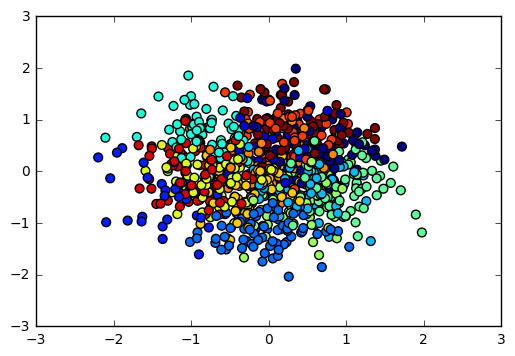

In [318]:
area = 40
colors = cluster_label

plt.scatter(FilteredFeatures_scaled_clusters[:, 0], FilteredFeatures_scaled_clusters[:, 1], s= area, c=colors)
plt.show()

In [319]:
FilteredFeatures.drop(FilteredFeatures[["Purchaser"]], axis = 1,inplace = True)

C:\Users\QP03\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [320]:
X_train, X_test, y_train, y_test = train_test_split(FilteredFeatures, y, test_size=0.33)

In [321]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [322]:
dt = DecisionTreeClassifier(max_depth=12,criterion="gini", min_samples_split=40,min_samples_leaf=50, random_state=99)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=50,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            presort=False, random_state=99, splitter='best')

In [323]:
output = dt.predict(X_test)

In [324]:
dt.score(X_test,y_test)

0.81212121212121213

In [325]:
l=list(X_test.columns.values)
l

['Branded clothing',
 'Shopping centres',
 'Achievements',
 'Finances',
 'Shopping',
 'Funniness',
 'Knowing the right people',
 'Western',
 'Number of friends',
 'Cars',
 'Height',
 'Weight',
 'Charity',
 'Adrenaline sports',
 'Small - big dogs',
 'Economy Management',
 'Energy levels',
 'Celebrities',
 'Snakes',
 'Getting angry',
 'Darkness',
 'Criminal damage',
 'Techno, Trance',
 'Pop',
 'Law',
 'Empathy',
 'Countryside, outdoors',
 'Science and technology',
 'Foreign languages',
 'Heights',
 'Healthy eating',
 'Internet',
 'Cheating in school',
 'Writing',
 'Animated',
 'Dancing',
 'Pets',
 'Appearence and gestures',
 'Decision making',
 'Dangerous dogs',
 'Rock',
 'Reading',
 'Comedy',
 'Borrowed stuff',
 'Personality',
 'Responding to a serious letter',
 'Action',
 'Metal or Hardrock',
 'Musical instruments',
 'Loss of interest',
 'Life struggles',
 'God',
 'Eating to survive',
 'Fear of public speaking',
 'Art exhibitions',
 'Finding lost valuables',
 'Hiphop, Rap',
 'Sci-fi',


In [326]:
#save the tree inside a pdf file

from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
feature_names=l,
class_names=["0","1"],
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("C:/Users/QP03/1.DataSets/Young People/Purchasers2.pdf")

True

In [327]:
#remove all outliers
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#FilteredFeatures[list_of_Numeric_fields] = scaler.fit_transform(FilteredFeatures[list_of_Numeric_fields])
FilteredFeatures = scaler.fit_transform(FilteredFeatures)

#for i in list_of_Numeric_fields:
#    df_noNan[(np.abs(stats.zscore(df_noNan[i])) < 3)]
